## 可视化第二课（seaborn）练习

####  作业提交说明：
- 位置：作业文件统一放置于/0.Teacher/Exercise/seaborn/下
- 文件名：请先复制该notebook文件，并重新命名为(课程名)+(您姓名的全拼)，并按要求完成后保存
- 时间：课程结束后的第二天前提交。
- 注意：请勿抄袭，移动，修改，删除其他同学和原始空白的练习文件。

<font color=red>为方便其他人查看，请大家不要随意修改答案，若要在答案上修改，请自行下载或copy后进行，有问题在群里反馈<font>

# seaborn可视化练习

In [165]:
%matplotlib inline
import matplotlib as mp
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

## 练习1：航班乘客变化分析
* 分析年度乘客总量变化情况（折线图）
* 分析乘客在一年中各月份的分布（柱状图）

In [58]:
data = sns.load_dataset("flights")
data.head()

# 年份，月份，乘客数

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


【参考答案】

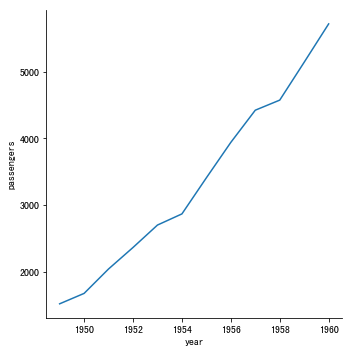

In [59]:
# 分析年度乘客总量变化情况（折线图）
df = data.groupby(data['year']).sum().reset_index()
sns.relplot( x="year",y="passengers",kind="line",ci=None,data=df)

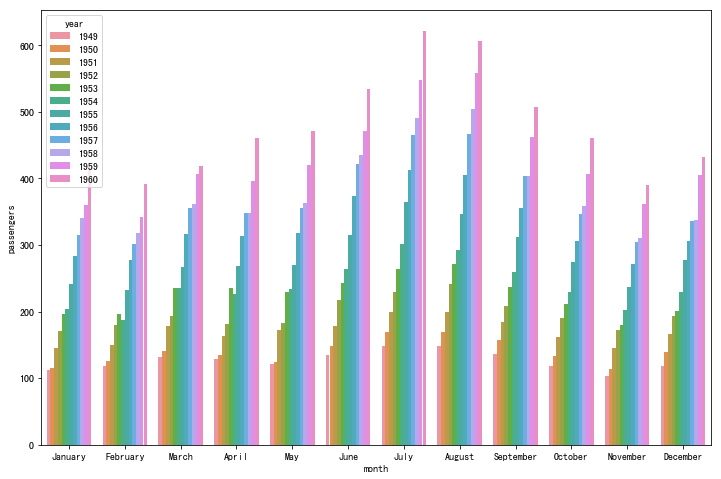

In [60]:
# 分析乘客在一年中各月份的分布（柱状图）
plt.rcParams["figure.figsize"] = (12,8)
sns.barplot(x="month", y="passengers", hue='year', data=data)

## 练习2：鸢尾花花型尺寸分析
* 萼片（sepal）和花瓣（petal）的大小关系（散点图）
* 不同种类（species）鸢尾花萼片和花瓣的大小关系（分类散点子图）
* 不同种类鸢尾花萼片和花瓣大小的分布情况（柱状图或者箱式图）

In [166]:
data = sns.load_dataset("iris")
data.head()
# 萼片长度，萼片宽度，花瓣长度，花瓣宽度，种类

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


【参考答案】

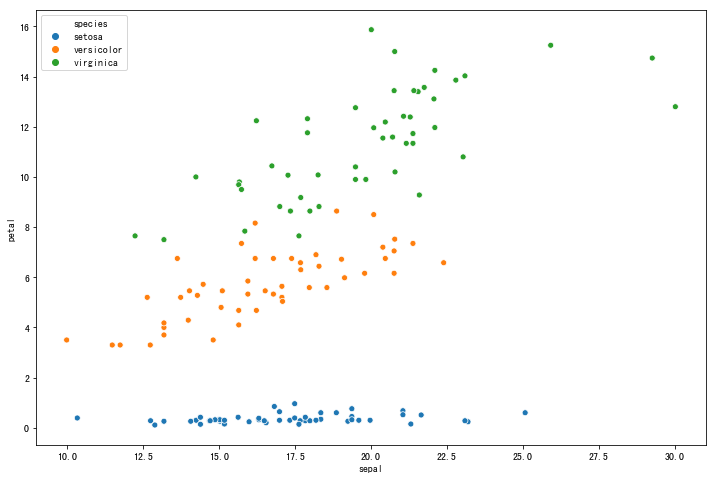

In [167]:
#萼片（sepal）和花瓣（petal）的大小关系（散点图）
plt.rcParams["figure.figsize"] = (12,8)
data.loc[:,'sepal'] = data['sepal_length'] * data['sepal_width']
data.loc[:,'petal'] = data['petal_length'] * data['petal_width']
sns.scatterplot(x="sepal", y="petal", hue="species", data=data)

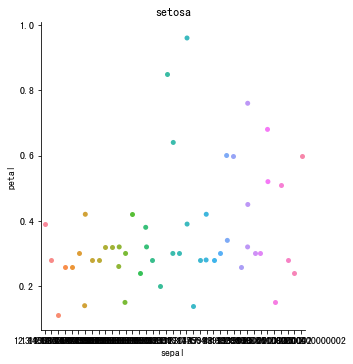

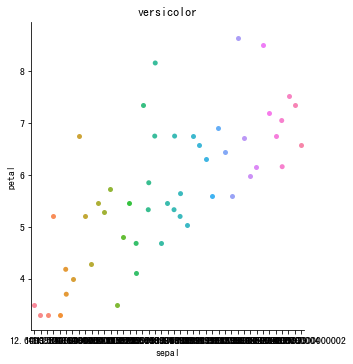

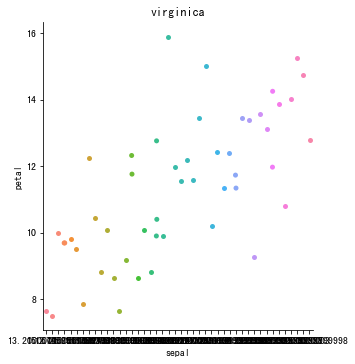

In [104]:
#不同种类（species）鸢尾花萼片和花瓣的大小关系（分类散点子图）
species = data['species'].unique() 
for i in range(len(species)):
    data_species = data.loc[data['species'] == species[i], :]
    sns.catplot(x="sepal", y="petal", data=data_species)
    plt.title(species[i])

Text(0.5, 1.0, 'setosa')

Text(0.5, 1.0, 'versicolor')

Text(0.5, 1.0, 'virginica')

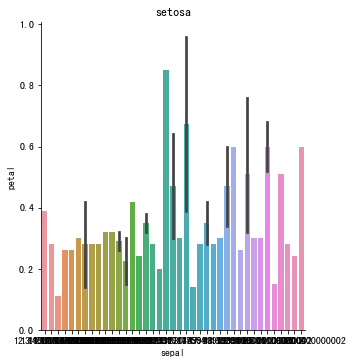

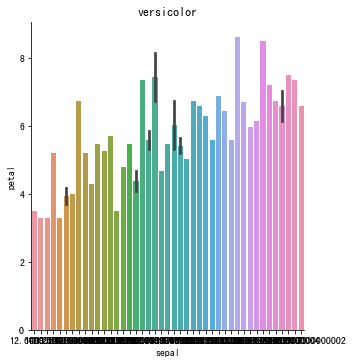

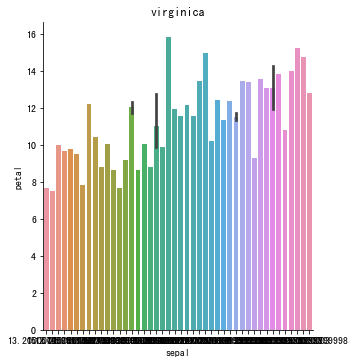

In [114]:
#不同种类鸢尾花萼片和花瓣大小的分布情况（柱状图或者箱式图）
species = data['species'].unique() 
for i in range(len(species)):
    data_species = data.loc[data['species'] == species[i], :]
    sns.catplot(x="sepal", y="petal", kind='bar', data=data_species) #柱状图
    #sns.catplot(x="sepal", y="petal", kind='box', data=data_species)  #箱式图
    plt.title(species[i])

【对比参考：使用barplot在不同cell中作图】

## 练习3：餐厅小费情况分析
* 小费和总消费之间的关系（散点图）
* 男性顾客和女性顾客，谁更慷慨（分类箱式图）
* 抽烟与否是否会对小费金额产生影响（分类箱式图）
* 工作日和周末，什么时候顾客给的小费更慷慨（分类箱式图）
* 午饭和晚饭，哪一顿顾客更愿意给小费（分类箱式图）
* 就餐人数是否会对慷慨度产生影响（分类箱式图）
* 性别+抽烟的组合因素对慷慨度的影响（分组柱状图）

In [65]:
data = sns.load_dataset("tips")
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


【参考答案】

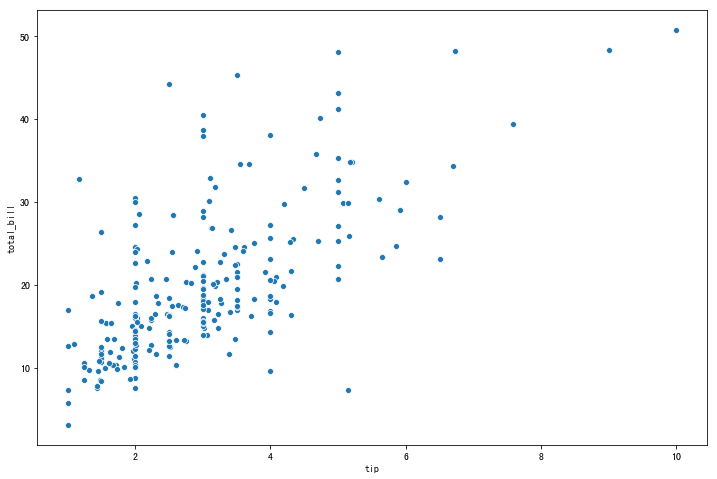

In [66]:
#小费和总消费之间的关系（散点图）
sns.scatterplot(x="tip", y="total_bill", data=data)

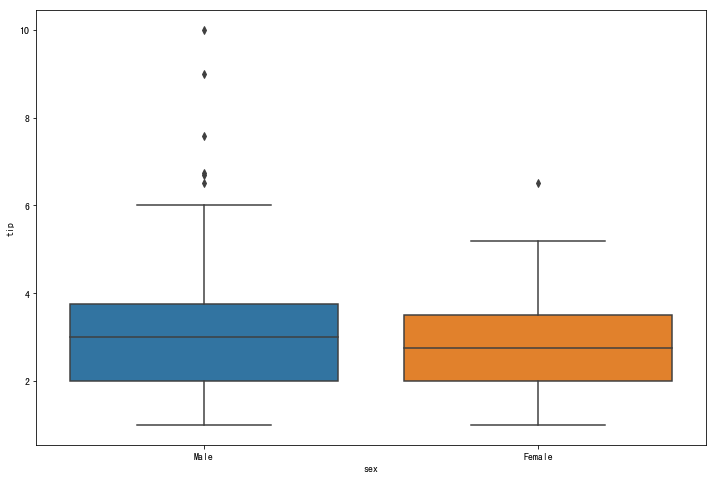

In [67]:
#男性顾客和女性顾客，谁更慷慨（分类箱式图）
sns.boxplot(x="sex", y="tip", data=data)

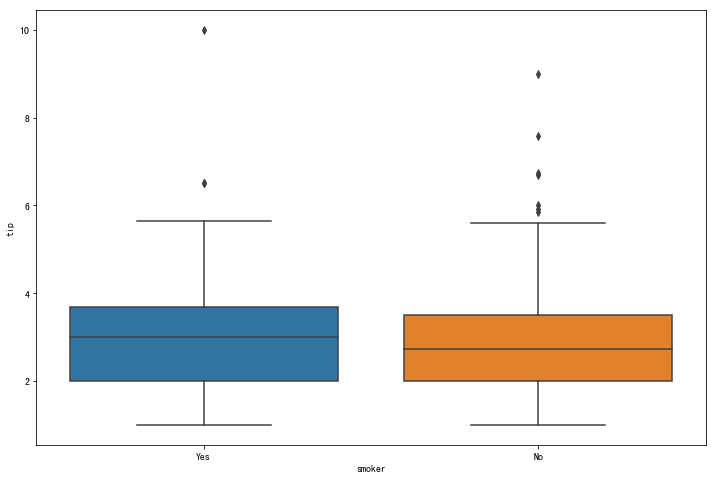

In [68]:
#抽烟与否是否会对小费金额产生影响（分类箱式图）
sns.boxplot(x="smoker", y="tip", data=data)

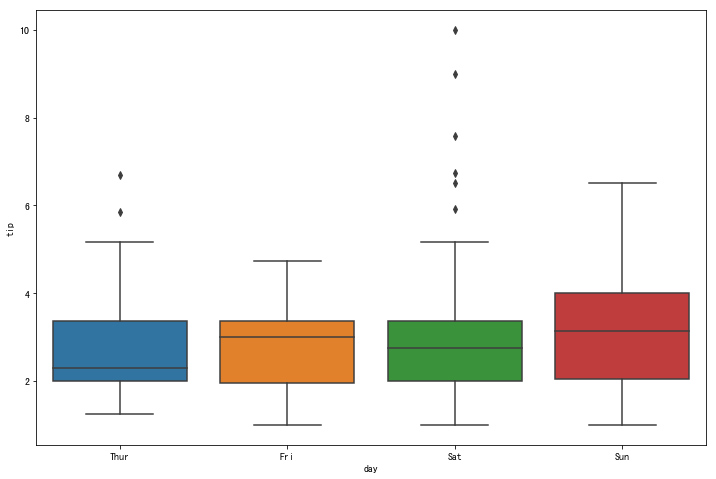

In [69]:
#工作日和周末，什么时候顾客给的小费更慷慨（分类箱式图）
sns.boxplot(x="day", y="tip", data=data)

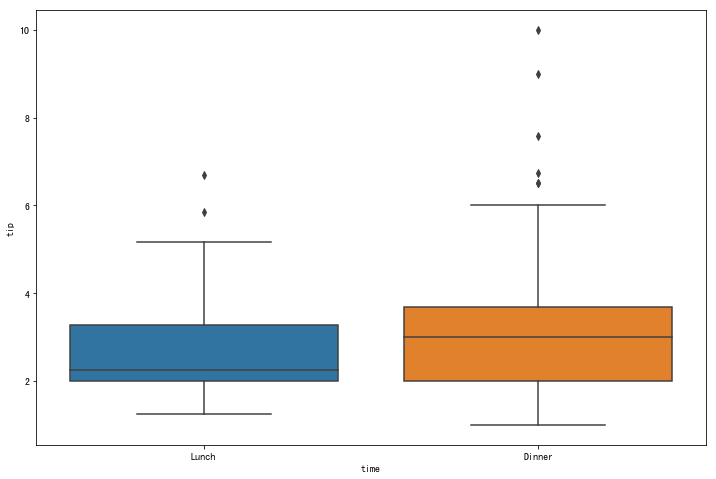

In [70]:
#午饭和晚饭，哪一顿顾客更愿意给小费（分类箱式图）
sns.boxplot(x="time", y="tip", data=data)

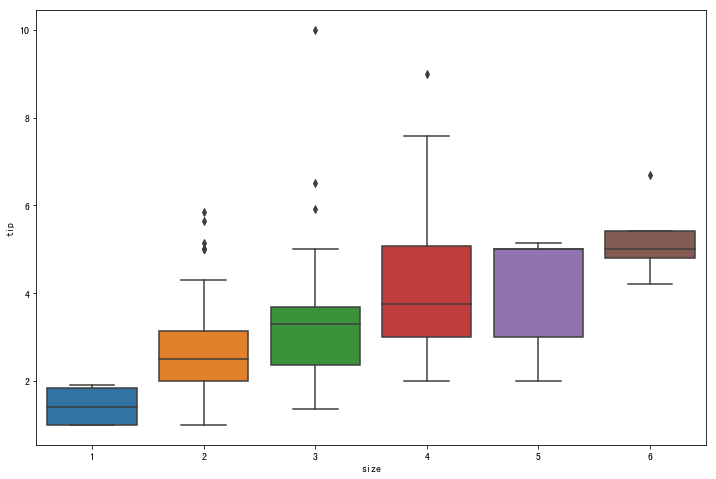

In [71]:
#就餐人数是否会对慷慨度产生影响（分类箱式图）
sns.boxplot(x="size", y="tip", data=data)

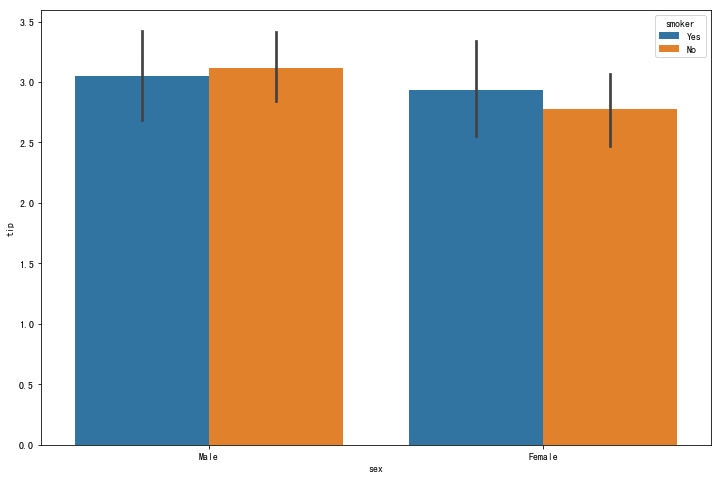

In [72]:
#性别+抽烟的组合因素对慷慨度的影响（分组柱状图）
sns.barplot(x="sex", y="tip", hue="smoker", data=data)

## 练习4：泰坦尼克号海难幸存状况分析
* 不同仓位等级中幸存和遇难的乘客比例（堆积柱状图）
* 不同性别的幸存比例（堆积柱状图）
* 幸存和遇难乘客的票价分布（分类箱式图）
* 幸存和遇难乘客的年龄分布（分类箱式图）
* 不同上船港口的乘客仓位等级分布（分组柱状图）
* 幸存和遇难乘客堂兄弟姐妹的数量分布（分类箱式图）
* 幸存和遇难乘客父母子女的数量分布（分类箱式图）
* 单独乘船与否和幸存之间有没有联系（堆积柱状图或者分组柱状图）

In [122]:
data = sns.load_dataset("titanic")
data.head()
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


【参考答案】

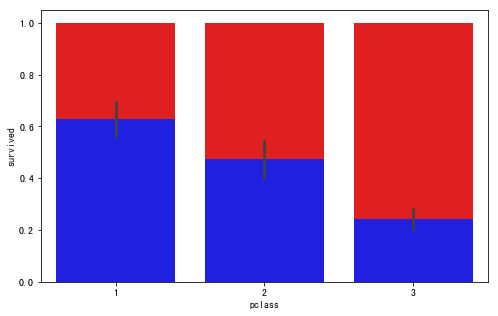

In [74]:
#不同仓位等级中幸存和遇难的乘客比例（堆积柱状图）
data['totle'] = 1
fig, ax = plt.subplots(figsize = (8,5)) 
sns.barplot(x = "pclass", y  = "totle", data = data, color = "r", ax = ax)
sns.barplot(x = "pclass", y  = "survived", data = data, color = "b", ax = ax)

(0, 1.3)

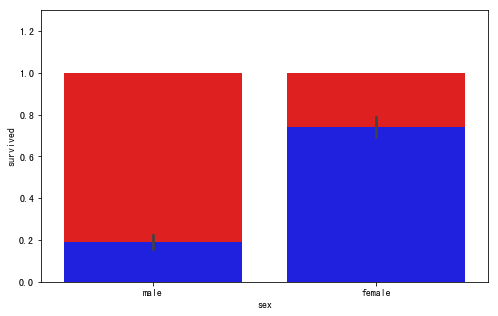

In [75]:
#不同性别的幸存比例（堆积柱状图）
fig, ax = plt.subplots(figsize = (8,5)) 
sns.barplot(x = "sex", y  = "totle", data = data, color = "r", ax = ax)
sns.barplot(x = "sex", y  = "survived", data = data, color = "b", ax = ax)
plt.ylim(0, 1.3)#y轴的范围

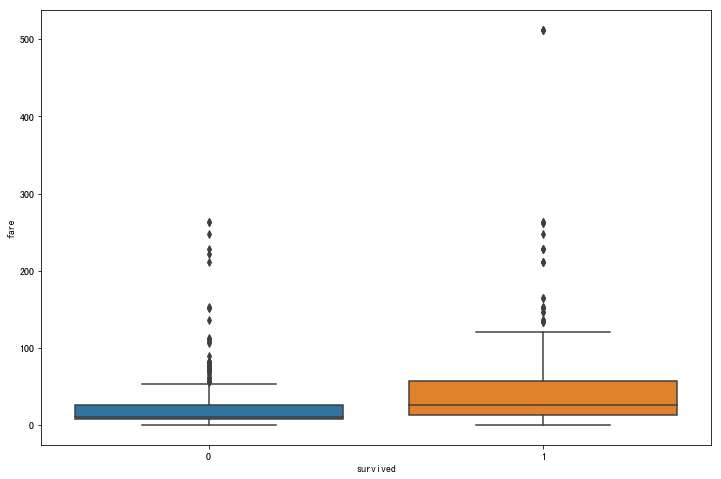

In [76]:
#幸存和遇难乘客的票价分布（分类箱式图）
sns.boxplot(x="survived", y="fare", data=data)

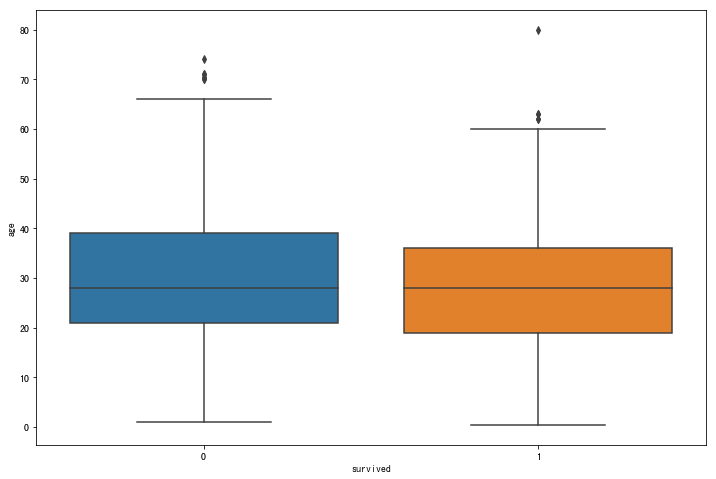

In [77]:
#幸存和遇难乘客的年龄分布（分类箱式图）
sns.boxplot(x="survived", y="age", data=data)

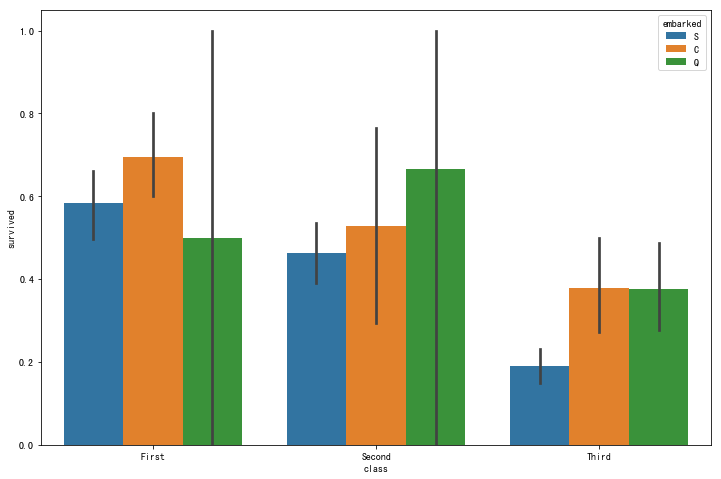

In [78]:
#不同上船港口的乘客仓位等级分布（分组柱状图）
sns.barplot(x="class", y="survived", hue="embarked", data=data)

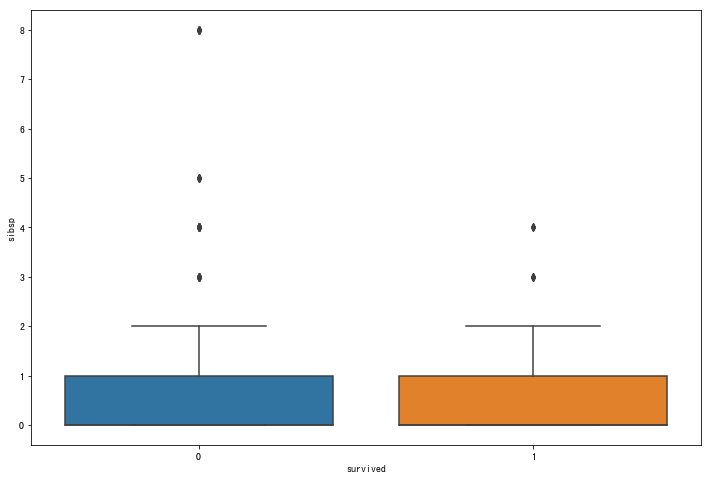

In [79]:
#幸存和遇难乘客堂兄弟姐妹的数量分布（分类箱式图）
sns.boxplot(x="survived", y="sibsp", data=data)

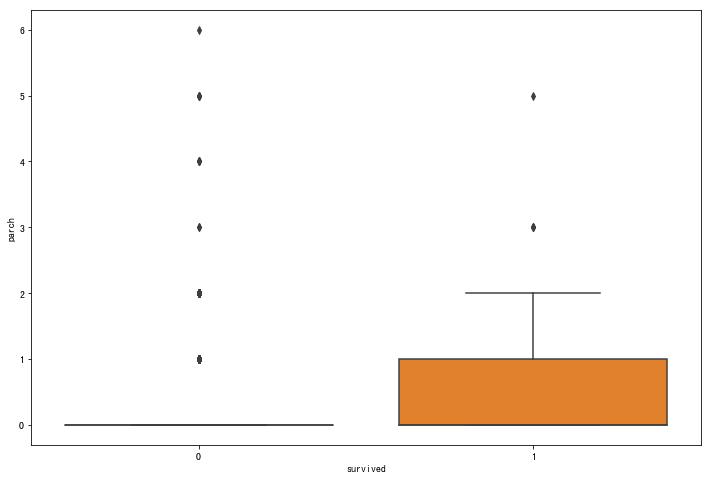

In [80]:
#幸存和遇难乘客父母子女的数量分布（分类箱式图）
sns.boxplot(x="survived", y="parch", data=data)

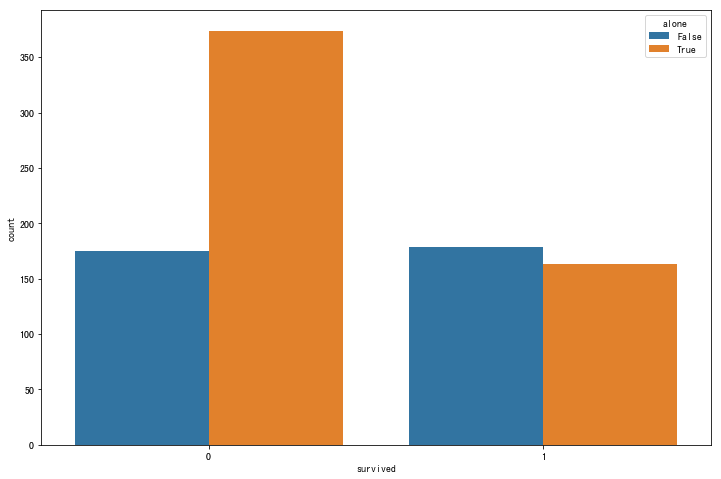

In [81]:
#单独乘船与否和幸存之间有没有联系（堆积柱状图或者分组柱状图）
#fig, ax = plt.subplots(figsize = (8,5)) 
#sns.barplot(x = "alone", y  = "totle", data = data, color = "r", ax = ax)
#sns.barplot(x = "alone", y  = "survived", data = data, color = "b", ax = ax) #堆积柱状图
sns.countplot(x="survived", hue="alone", data=data) #分组柱状图